In [18]:
from cleaning import clean_data, SMOTE_resample
import numpy as np
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression, SelectPercentile, mutual_info_classif
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from collections import Counter
from evaluate import qwk
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import BaggingClassifier

In [25]:
# Load Data
X_train, y_train, X_test, y_test = clean_data('')
# print(Counter(y_train))

# SMOTE resampling
X_train, y_train = SMOTE_resample(X_train, y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
# print(Counter(y_train))
# # Feature selection
# pca = PCA(svd_solver='full')
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [6]:
losses = ["hinge", "squared_hinge"]
learning_rates = [1e-4, 1e-2, 1e-1, 1]
penalties = ["l1", "l2"]
max_iters = [1000, 5000, 10000]

random_grid = {
    "C": learning_rates,
    "penalty": penalties,
    "max_iter": max_iters,
    "loss": losses,
    "dual": [False]
}

svc = LinearSVC()
svc_random = RandomizedSearchCV(estimator=svc, param_distributions=random_grid, n_iter=25, cv=3, verbose=0, n_jobs=-1, error_score=np.NINF)
svc_random.fit(X_train, y_train)
print(f'Best Parameters = {svc_random.best_params_}')
print(f'Best Score = {svc_random.best_score_}')

c:\Users\Noah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
39 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to -inf.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Noah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Noah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "c:\Users\Noah\AppData\Local\Programs\Python\Python39\lib\site-pa

Best Parameters = {'penalty': 'l1', 'max_iter': 5000, 'loss': 'squared_hinge', 'dual': False, 'C': 1}
Best Score = 0.3589659481399039


In [7]:
# Linear SVC
best_params = {'penalty': 'l1', 'max_iter': 5000, 'loss': 'squared_hinge', 'dual': False, 'C': 1}
# best_params = svc_random.best_params_
lsvc = LinearSVC(penalty=best_params['penalty'], max_iter=best_params['max_iter'], loss=best_params['loss'], dual=best_params['dual'], C=best_params['C'])
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
print(f'Train Score = {lsvc.score(X_train, y_train)}')
print(f'Test Score = {lsvc.score(X_test, y_test)}')
print(f'QWK = {qwk(y_test, y_pred)}')
print(f'Cohens Kappa Score = {cohen_kappa_score(y_test, y_pred)}')

Train Score = 0.39319496427356243
Test Score = 0.2881280569141841
QWK = 0.9999999616993961
Cohens Kappa Score = 0.11249189601586229


In [4]:
# SVC
learning_rates = [1e-15, 1e-8, 1e-4, 1e-2, 1e-1, 1]
gammas = ['scale', 'auto']

random_grid = {
    "C": learning_rates,
    "gamma": gammas,
}

svc = SVC(kernel='rbf', class_weight='balanced')
svc_random = RandomizedSearchCV(estimator=svc, param_distributions=random_grid, n_iter=6, cv=3, verbose=0, n_jobs=-1, error_score=np.NINF)
svc_random.fit(X_train, y_train)
print(f'Best Parameters = {svc_random.best_params_}')
print(f'Best Score = {svc_random.best_score_}')


Best Parameters = {'gamma': 'scale', 'C': 0.1}
Best Score = 0.3718275491316314


In [5]:
# SVC
best_params = {'gamma': 'scale', 'C': 0.1}
# best_params = svc_random.best_params_
svc = SVC(kernel='rbf', class_weight='balanced', gamma=best_params['gamma'], C=best_params['C'])
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f'Train Score = {svc.score(X_train, y_train)}')
print(f'Test Score = {svc.score(X_test, y_test)}')
print(f'QWK = {qwk(y_test, y_pred)}')
kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Cohens Kappa Score = {kappa}')

Train Score = 0.4293297039809459
Test Score = 0.31036016007114275
QWK = 0.9999999610155443
Cohens Kappa Score = 0.21126633714622056


In [7]:
# Bagging Classifier
bc = BaggingClassifier(base_estimator=svc, n_estimators=10, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
print(f'Train Score = {bc.score(X_train, y_train)}')
print(f'Test Score = {bc.score(X_test, y_test)}')
print(f'QWK = {qwk(y_test, y_pred)}')
kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Cohens Kappa Score = {kappa}')

Train Score = 0.628989452194624
Test Score = 0.35460204535349044
QWK = 0.9999999637451413
Cohens Kappa Score = 0.26649155334605124


In [24]:
# PCA Decomposition
pca = PCA(n_components=50, svd_solver='auto')
pcaX_train = pca.fit_transform(X_train)
pcaX_test = pca.transform(X_test)

# Select Percentile
sp = SelectPercentile(mutual_info_classif)
spX_train = sp.fit_transform(X_train, y_train)
spX_test = sp.transform(X_test)

# Variance Threshold
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
vtX_train = vt.fit_transform(X_train, y_train)
vtX_test = vt.transform(X_test)

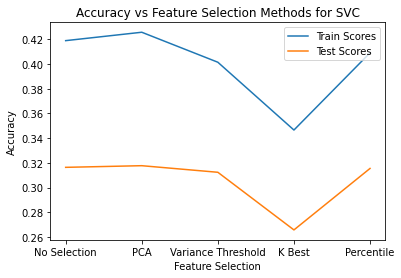

In [23]:
# Feature Selection
dataLabels = ['No Selection', 'PCA', 'Variance Threshold', 'Percentile']
data = [(X_train, X_test), (pcaX_train, pcaX_test), (vtX_train, vtX_test), (spX_train, spX_test)]

trainScores = []
testScores = []
for i, label in enumerate(dataLabels):
    xtrain, xtest = data[i]
    svc = SVC(kernel='rbf', class_weight='balanced', gamma='scale', C=0.1)
    svc.fit(xtrain, y_train)
    trainScores.append(svc.score(xtrain, y_train))
    testScores.append(svc.score(xtest, y_test))

plt.plot(dataLabels, trainScores, label='Train Scores')
plt.plot(dataLabels, testScores, label='Test Scores')
plt.title(f'Accuracy vs Feature Selection Methods for SVC')
plt.xlabel('Feature Selection')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()